In [5]:
import pandas as pd
df = pd.read_csv('loans_full_schema.csv')
num_rows, num_columns = df.shape
column_info = []

for column in df.columns:
    column_data_type = df[column].dtype
    unique_values = df[column].nunique()
    sample_values = df[column].sample(5).values  # Get 5 sample values
    column_info.append({
        'Column Name': column,
        'Data Type': column_data_type,
        'Unique Values': unique_values,
        'Sample Values': sample_values
    })
column_summary = pd.DataFrame(column_info)

# Display the summary
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("\nColumn Information:")
print(column_summary)

Number of rows: 10000
Number of columns: 55

Column Information:
                         Column Name Data Type  Unique Values  \
0                          emp_title    object           4741   
1                         emp_length   float64             11   
2                              state    object             50   
3                      homeownership    object              3   
4                      annual_income   float64           1463   
5                    verified_income    object              3   
6                     debt_to_income   float64           3673   
7                annual_income_joint   float64            596   
8          verification_income_joint    object              3   
9               debt_to_income_joint   float64           1189   
10                         delinq_2y     int64             12   
11          months_since_last_delinq   float64             97   
12              earliest_credit_line     int64             53   
13                inquiri

In [11]:
display(df)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,security supervisor,10.0,KY,OWN,34000.0,Not Verified,6.46,57000.0,Verified,37.66,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,155000.0,Not Verified,13.12,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,155000.0,Not Verified,13.12,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,210000.0,Source Verified,23.46,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,210000.0,Source Verified,23.46,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,107000.0,Source Verified,29.57,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


              emp_title  emp_length state homeownership  annual_income  \
4  security supervisor         10.0    CA          RENT        35000.0   
5  security supervisor         10.0    KY           OWN        34000.0   
6                   hr         10.0    MI      MORTGAGE        35000.0   
7                police        10.0    AZ      MORTGAGE       110000.0   
8                 parts        10.0    NV      MORTGAGE        65000.0   

   verified_income  debt_to_income  annual_income_joint  \
4         Verified           57.96              57000.0   
5     Not Verified            6.46              57000.0   
6  Source Verified           23.66             155000.0   
7  Source Verified           16.19             155000.0   
8  Source Verified           36.48             155000.0   

  verification_income_joint  debt_to_income_joint  ...  sub_grade  \
4                  Verified                 37.66  ...         C3   
5                  Verified                 37.66  ...        

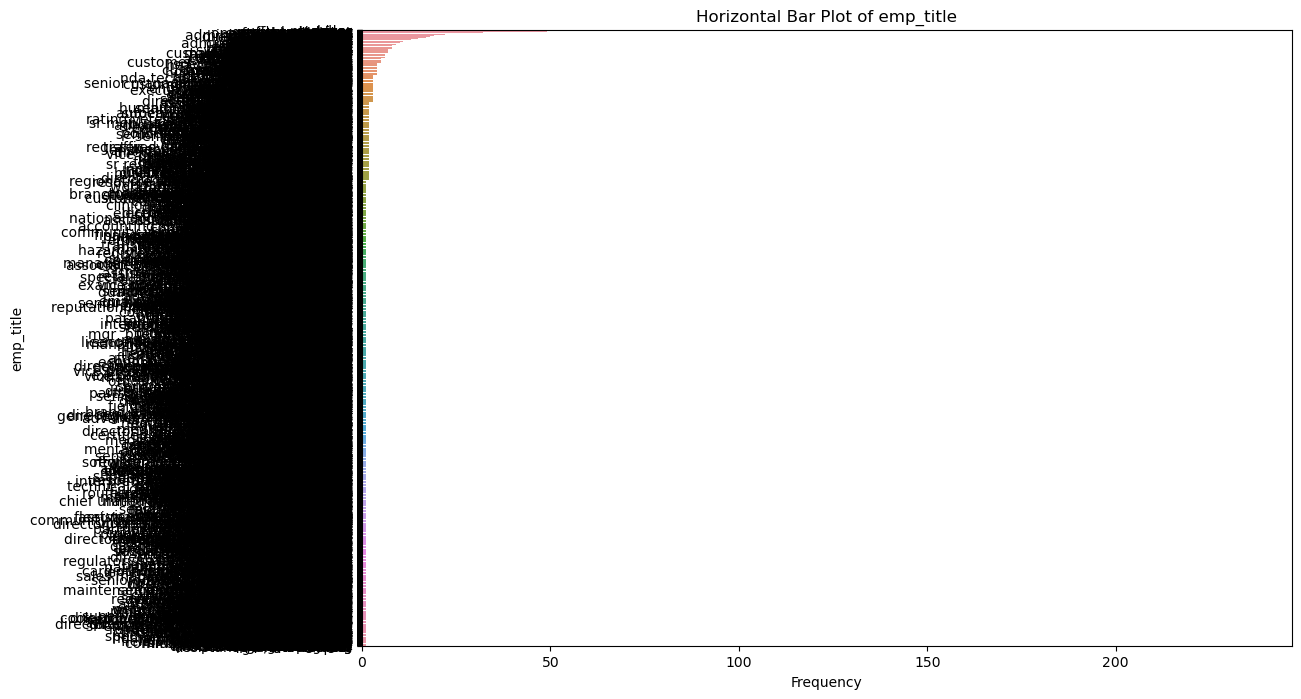

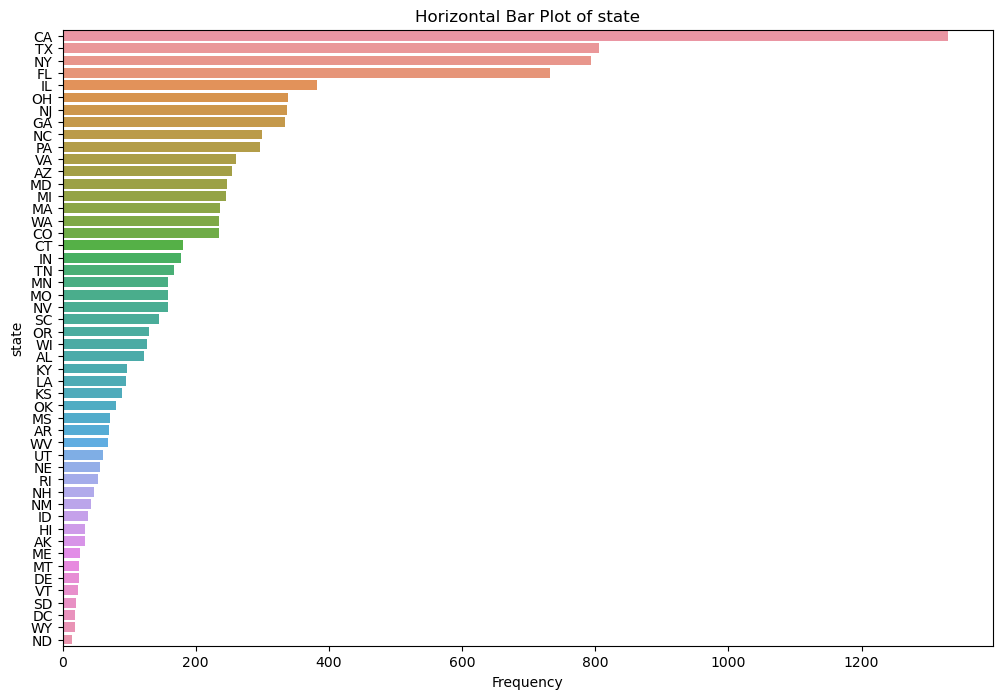

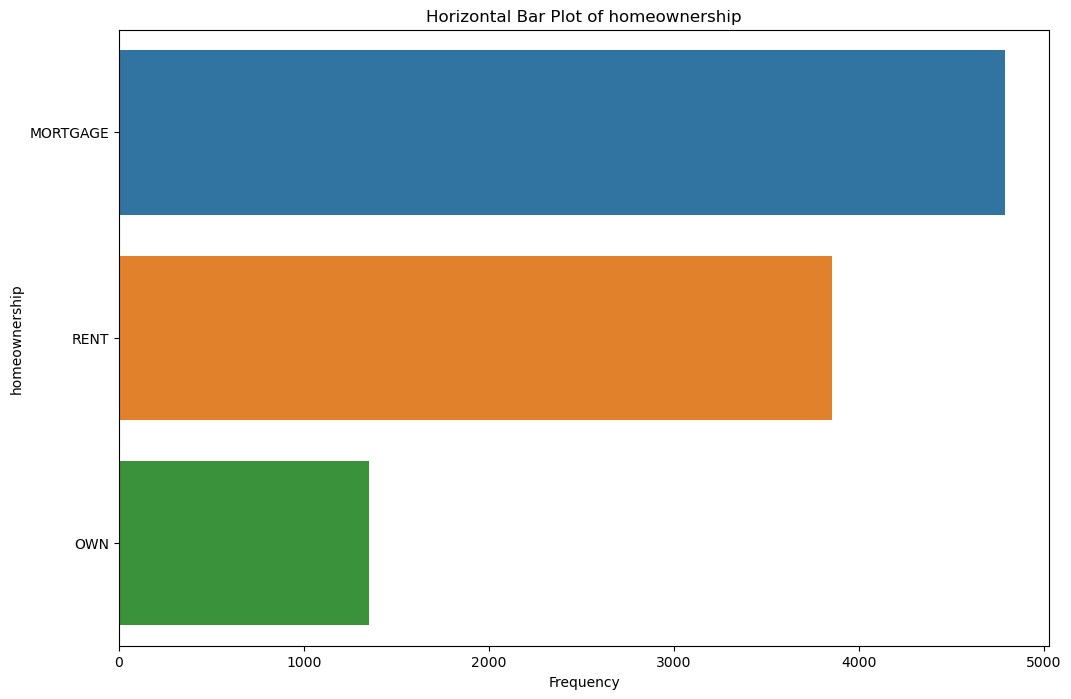

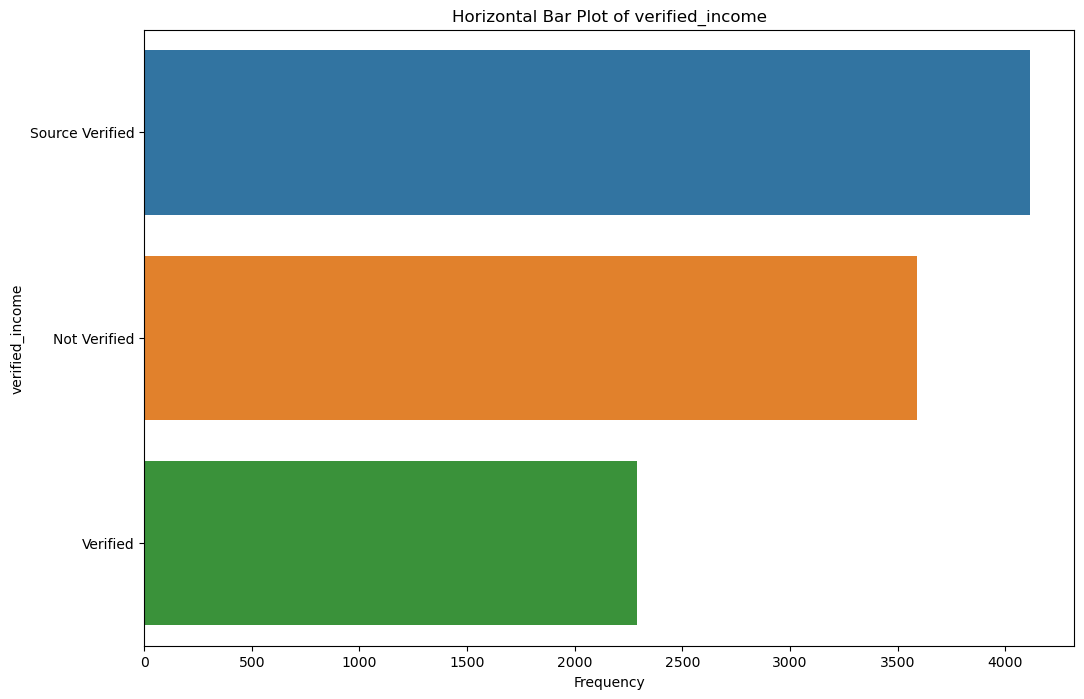

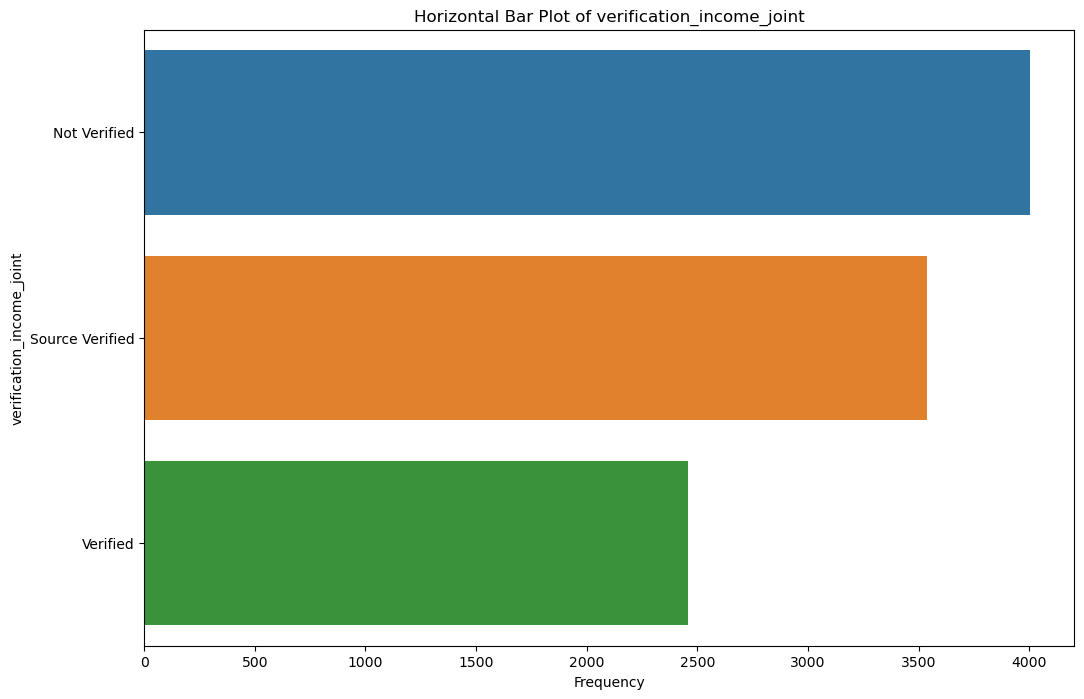

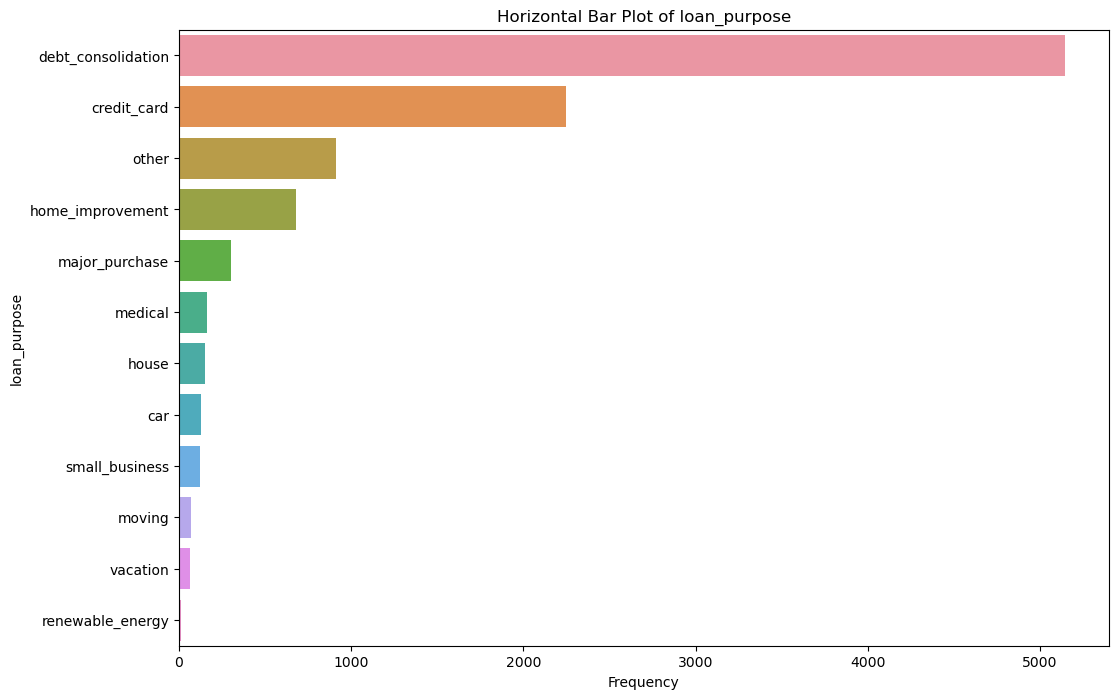

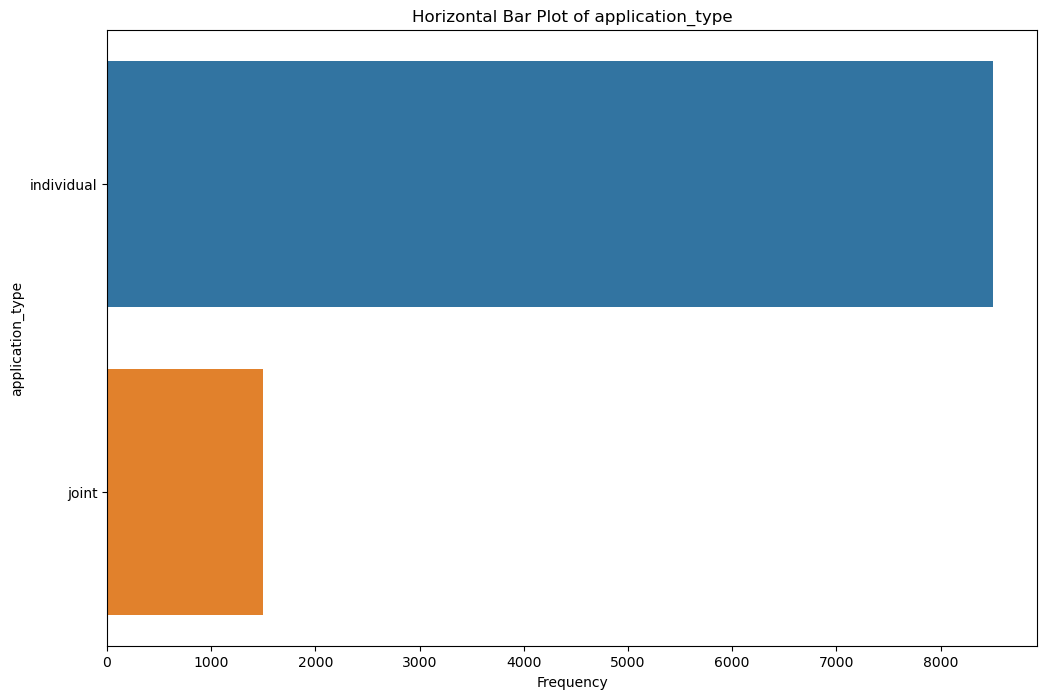

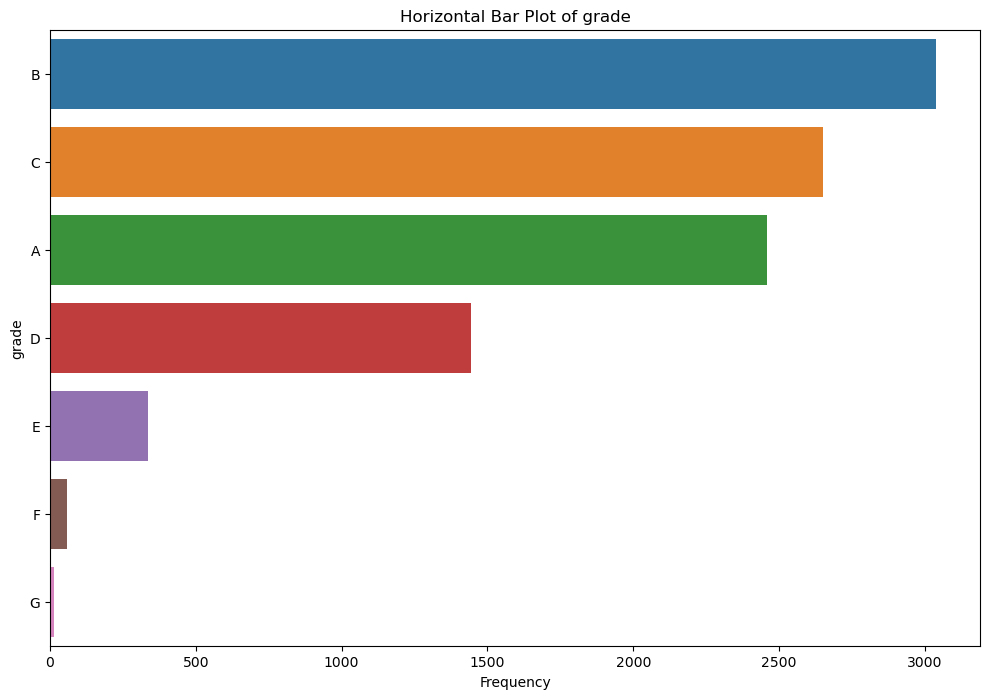

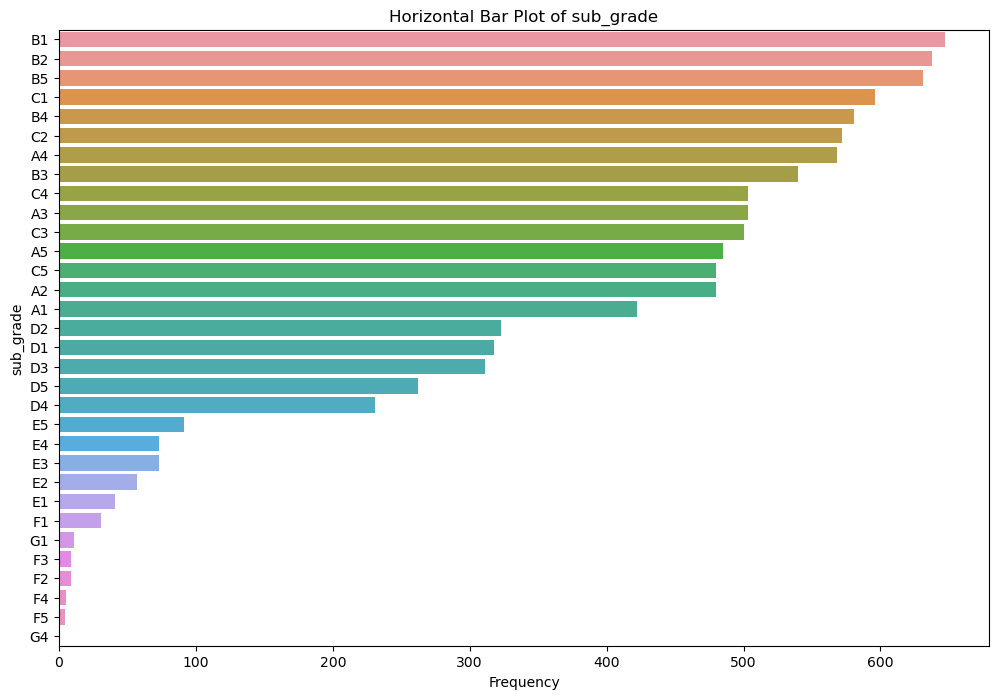

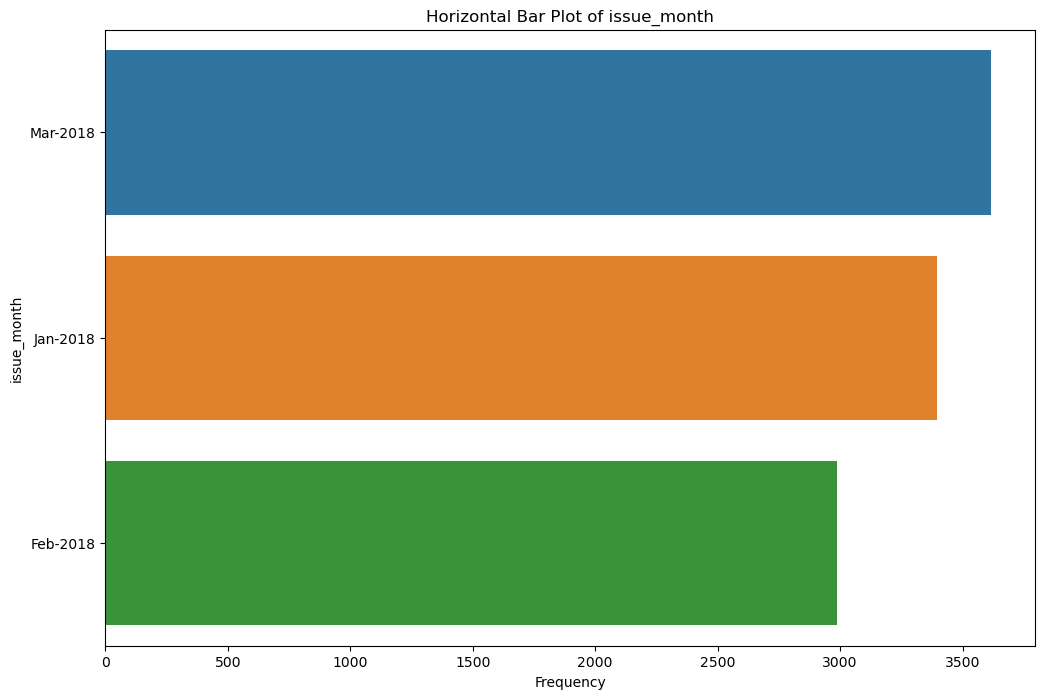

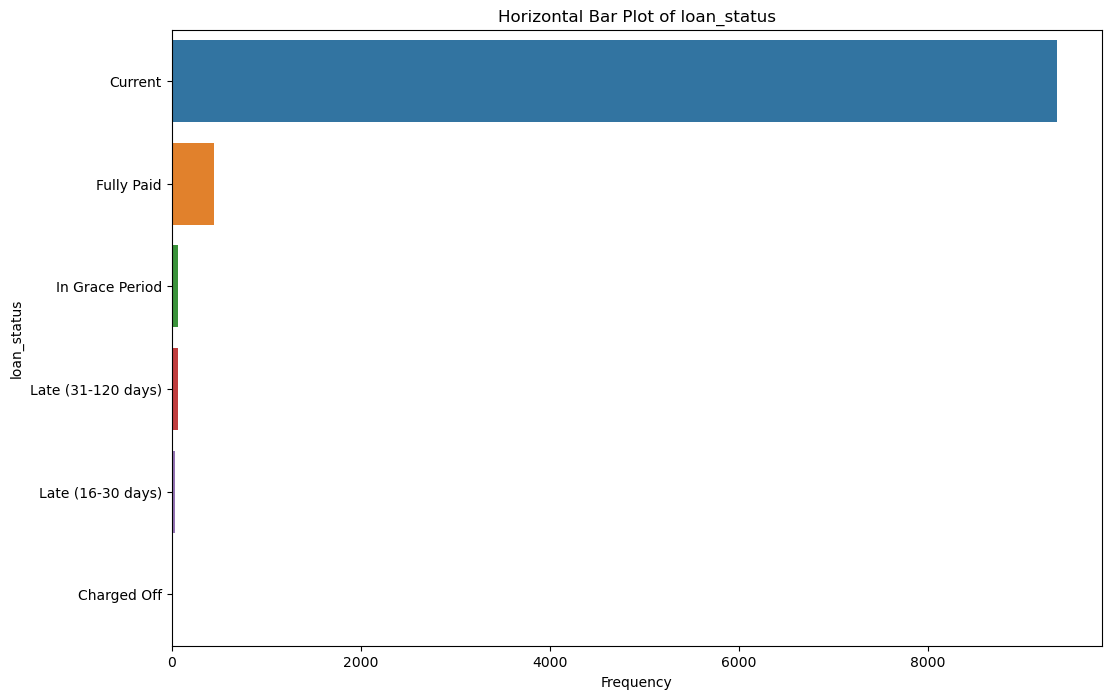

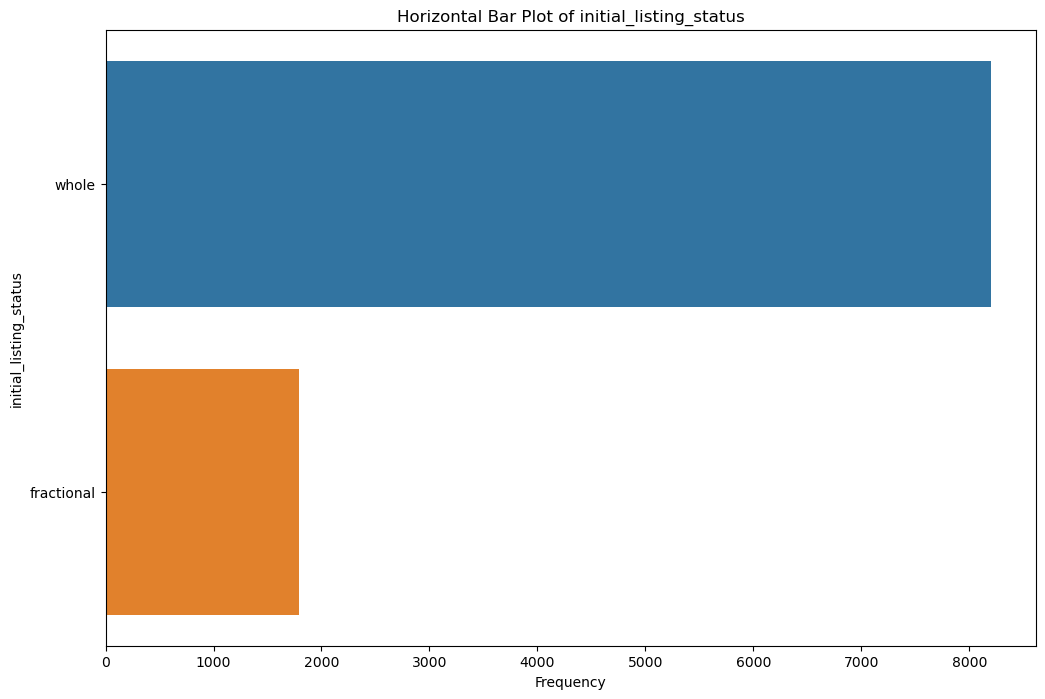

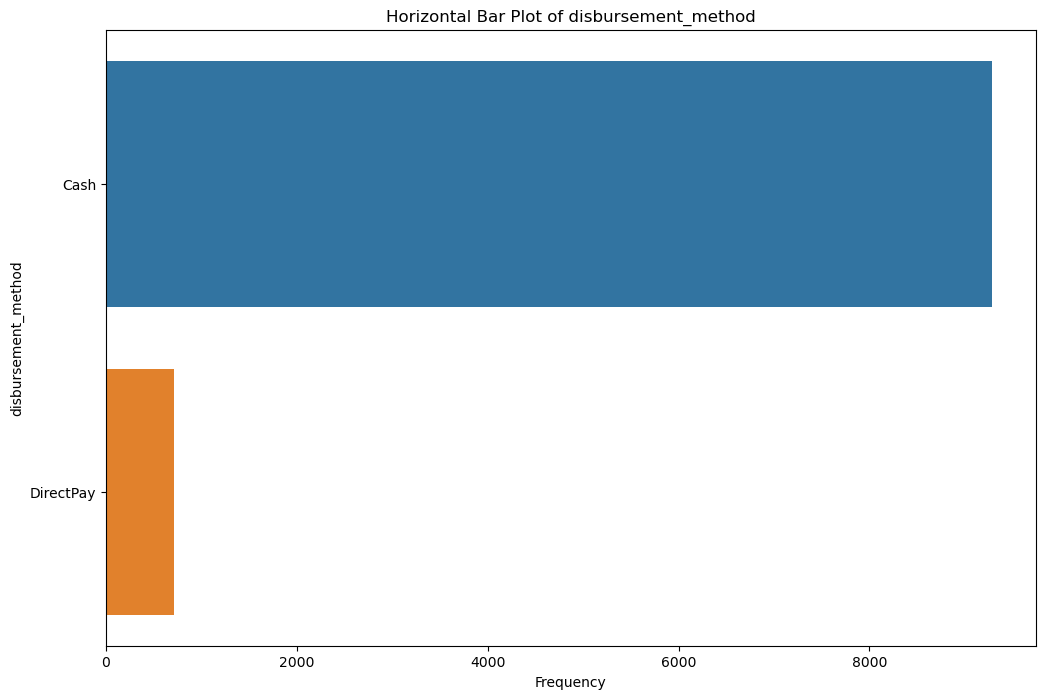

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect the Data
print(df.head())  # Display the first few rows of the DataFrame
print(df.info())  # Display information about the DataFrame, including data types
# Data Cleaning
# Handle missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values
df.dropna(inplace=True)  # Drop any remaining rows with missing values
# Convert object columns to string type
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)
# Data Analysis
# Summary statistics for numeric columns
print(df.describe())
# Data Visualization using Horizontal Bar Plots
# Visualize the frequency of each category for object columns
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Horizontal Bar Plot of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.show()
# Data Transformation
# Perform any necessary data transformations
# For example, you can encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)
# Save the cleaned and transformed data
df_encoded.to_csv('cleaned_dataset.csv', index=False)


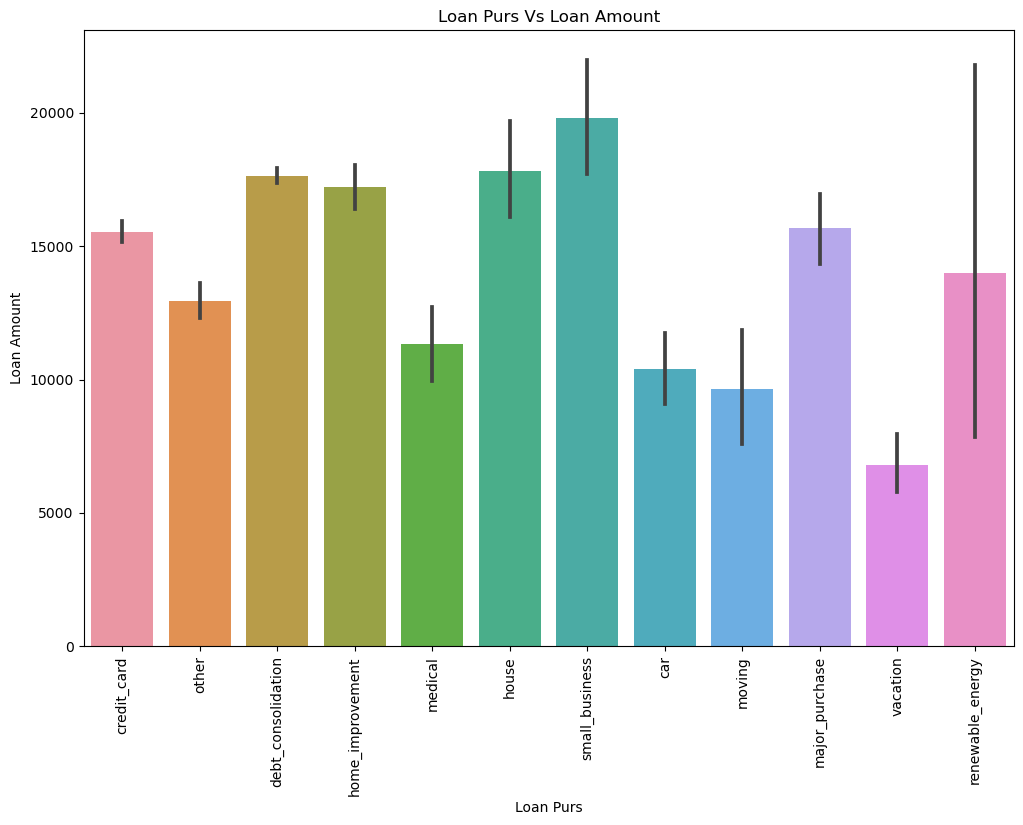

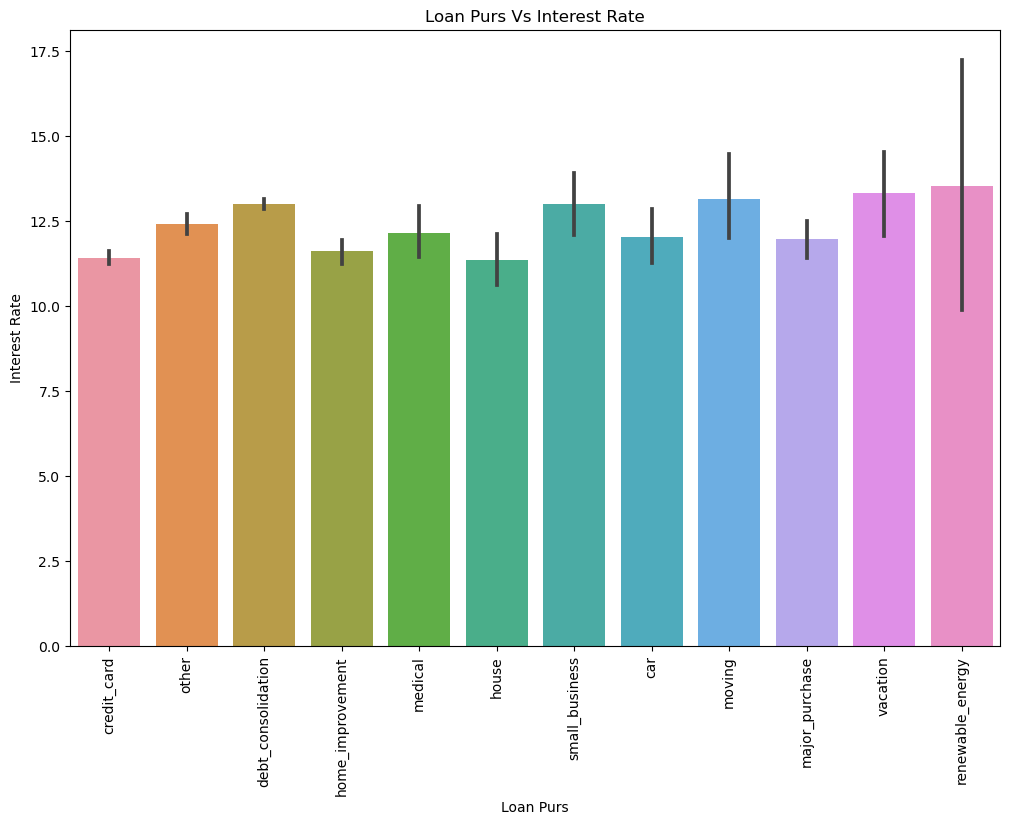

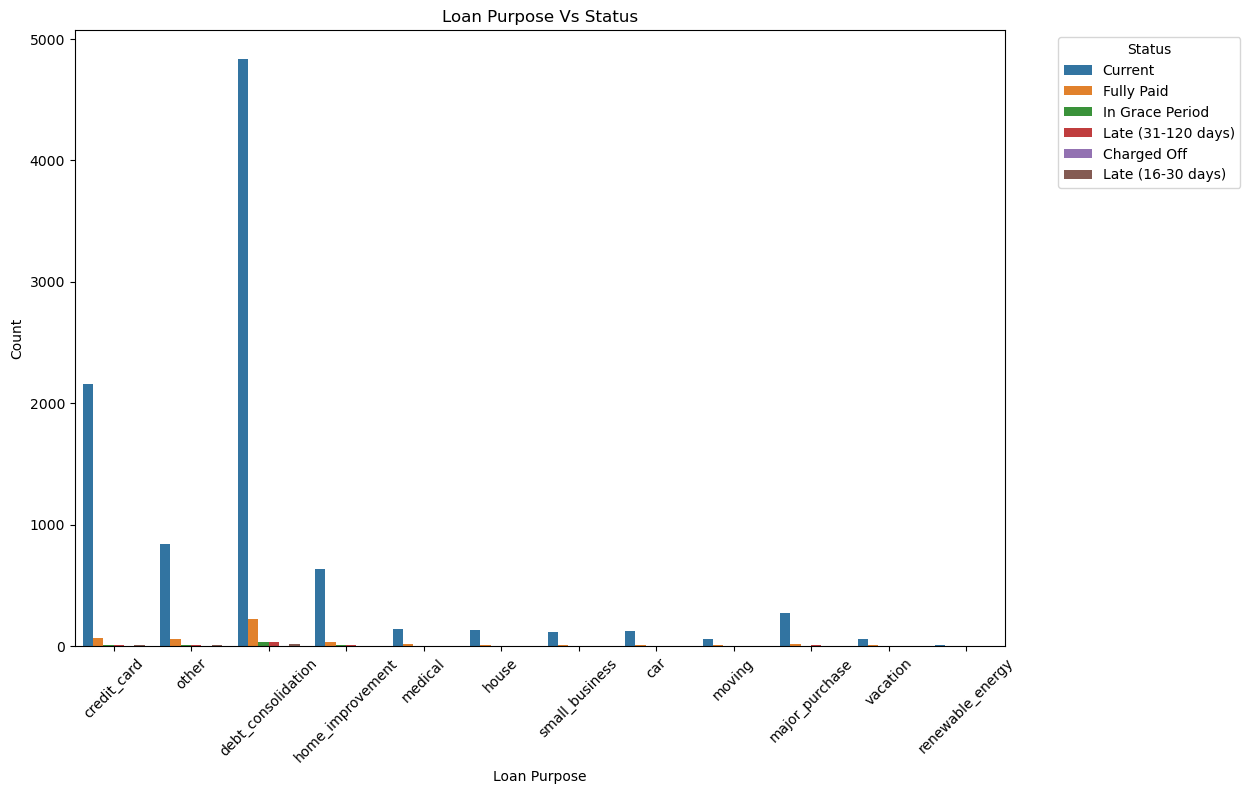

In [36]:
lis = ['loan_amount','interest_rate']
for i in lis:
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='loan_purpose', y=i)
    plt.title(f'Loan Purs Vs {i.replace("_", " ").title()}')
    plt.xlabel('Loan Purs')
    plt.xticks(rotation=90)
    plt.ylabel(i.replace('_', ' ').title())  # Formatting y-axis label
    plt.show()
    

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='loan_purpose', hue='loan_status')
plt.title('Loan Purpose Vs Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [54]:
import hvplot.pandas
df.hvplot.bar(x='loan_purpose', by='loan_status', rot=90, title='Loan Purpose Vs Status', legend='top_right', figsize=(100, 100),width=800, height=600)

:Bars   [loan_purpose,loan_status]   (emp_length)

In [56]:
df.hvplot.bar(x='loan_purpose', y='debt_to_income', rot=90, title='Loan Purpose Vs Status', legend='top_right', figsize=(100, 100),width=800, height=600)


:Bars   [loan_purpose]   (debt_to_income)

In [62]:
df.count

<bound method DataFrame.count of                  emp_title  emp_length state homeownership  annual_income  \
4     security supervisor         10.0    CA          RENT        35000.0   
5     security supervisor         10.0    KY           OWN        34000.0   
6                      hr         10.0    MI      MORTGAGE        35000.0   
7                   police        10.0    AZ      MORTGAGE       110000.0   
8                    parts        10.0    NV      MORTGAGE        65000.0   
...                    ...         ...   ...           ...            ...   
9995                owner         10.0    TX          RENT       108000.0   
9996              director         8.0    PA      MORTGAGE       121000.0   
9997             toolmaker        10.0    CT      MORTGAGE        67000.0   
9998               manager         1.0    WI      MORTGAGE        80000.0   
9999    operations analyst         3.0    CT          RENT        66000.0   

      verified_income  debt_to_income  ann